In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tools as tl
import stats as st
%load_ext autoreload
%autoreload 2

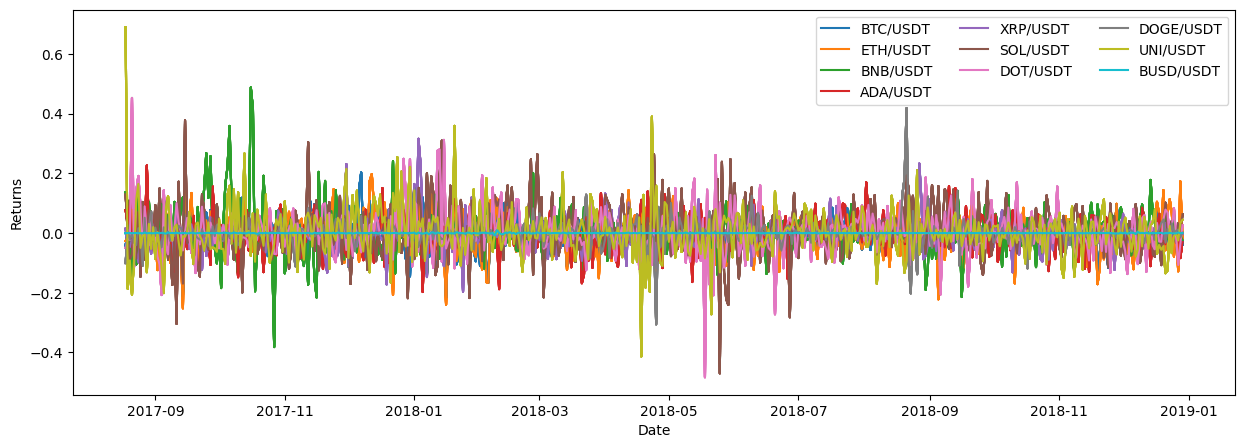

,BTC/USDT,ETH/USDT,BNB/USDT,ADA/USDT,XRP/USDT,SOL/USDT,DOT/USDT,DOGE/USDT,UNI/USDT,BUSD/USDT
Date,,,,,,,,,,
2017-08-18,-0.042113,-0.026983,0.136074,0.076931,0.014392,0.129833,-0.049597,-0.100517,0.689762,-0.000100
2017-08-19,0.007665,-0.010430,0.099795,0.030226,-0.042968,-0.006893,-0.017094,0.010714,-0.186784,0.000000
2017-08-20,-0.013053,0.027764,0.000553,0.108806,-0.047271,-0.089725,-0.023375,-0.022786,-0.091666,0.000100
2017-08-21,-0.017351,0.077772,-0.149713,-0.049009,-0.022348,-0.072005,0.452601,-0.001013,-0.206836,-0.000300
2017-08-22,0.005958,-0.042623,-0.034620,-0.017879,-0.014812,0.065710,-0.113183,-0.033078,-0.082571,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-12-25,-0.067662,-0.078571,0.065760,-0.013447,-0.013235,-0.015715,0.082494,-0.001087,-0.009407,-0.001101
2018-12-26,0.008493,0.013622,-0.024716,0.003026,-0.004438,-0.034087,-0.011238,0.007513,0.000000,-0.000902
2018-12-27,-0.057146,-0.128079,-0.001961,0.004823,0.004477,0.032419,-0.106904,0.011663,-0.024882,0.002103


In [2]:
coin_list = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT', 'ADA/USDT', 'XRP/USDT', 'SOL/USDT', 'DOT/USDT', 'DOGE/USDT', 'UNI/USDT', 'BUSD/USDT']
time = '1d'
limit = 100
dfs = []
for coin in coin_list:
    dfs.append(tl.preprocess_df(coin,time=time,limit=limit))
stocks = pd.concat(dfs,axis = 1)
return_df = pd.DataFrame(np.diff(np.log(stocks['Close']).T).T)
return_df.set_index(dfs[0]['Date'].iloc[1:], inplace=True)
return_df.columns = coin_list
plt.figure(figsize=(15,5))
for coin in coin_list:
    x = plt.plot(return_df)
plt.ylabel('Returns')
plt.xlabel('Date')
plt.legend(iter(x), return_df.columns, ncol=3)
plt.show()
return_df

In [3]:
#taking only Bitcoin
import ccxt
binance = ccxt.binance()
coin_ticker = binance.fetch_ohlcv('BTC/USDT', time, limit)
df = pd.DataFrame(coin_ticker, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume']) 
df['Date'] = pd.to_datetime(df['Date'], unit = 'ms' ) 
df

,Date,Open,High,Low,Close,Volume
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
495,2018-12-25,4010.11,4020.00,3646.41,3745.79,62725.629432
496,2018-12-26,3745.56,3837.15,3656.74,3777.74,42629.375817
497,2018-12-27,3777.74,3813.98,3535.00,3567.91,44097.392912
498,2018-12-28,3567.89,3887.25,3540.04,3839.26,45964.304987


In [4]:
stocks
price_df = pd.DataFrame(stocks['Close'])
price_df.set_index(dfs[0]['Date'].iloc[0:], inplace=True)
price_df.columns = coin_list
price_df

,BTC/USDT,ETH/USDT,BNB/USDT,ADA/USDT,XRP/USDT,SOL/USDT,DOT/USDT,DOGE/USDT,UNI/USDT,BUSD/USDT
Date,,,,,,,,,,
2017-08-17,4285.08,302.00,1.5710,0.24260,0.88990,3.2985,3.1000,0.003870,3.4617,1.0000
2017-08-18,4108.37,293.96,1.8000,0.26200,0.90280,3.7558,2.9500,0.003500,6.9000,0.9999
2017-08-19,4139.98,290.91,1.9889,0.27004,0.86483,3.7300,2.9000,0.003538,5.7244,0.9999
2017-08-20,4086.29,299.10,1.9900,0.30108,0.82490,3.4099,2.8330,0.003458,5.2230,1.0000
2017-08-21,4016.00,323.29,1.7133,0.28668,0.80667,3.1730,4.4546,0.003455,4.2471,0.9997
...,...,...,...,...,...,...,...,...,...,...
2018-12-25,3745.79,127.60,15.9589,0.04949,0.25519,179.9300,31.3200,0.002758,10.5800,0.9983
2018-12-26,3777.74,129.35,15.5693,0.04964,0.25406,173.9000,30.9700,0.002779,10.5800,0.9974
2018-12-27,3567.91,113.80,15.5388,0.04988,0.25520,179.6300,27.8300,0.002811,10.3200,0.9995


### Rank prices by window

e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)


0      100.000000
1       50.000000
2       66.666667
3       25.000000
4       20.000000
          ...    
495     25.000000
496     28.333333
497     21.666667
498     33.333333
499     26.666667
Name: Close, Length: 500, dtype: float64

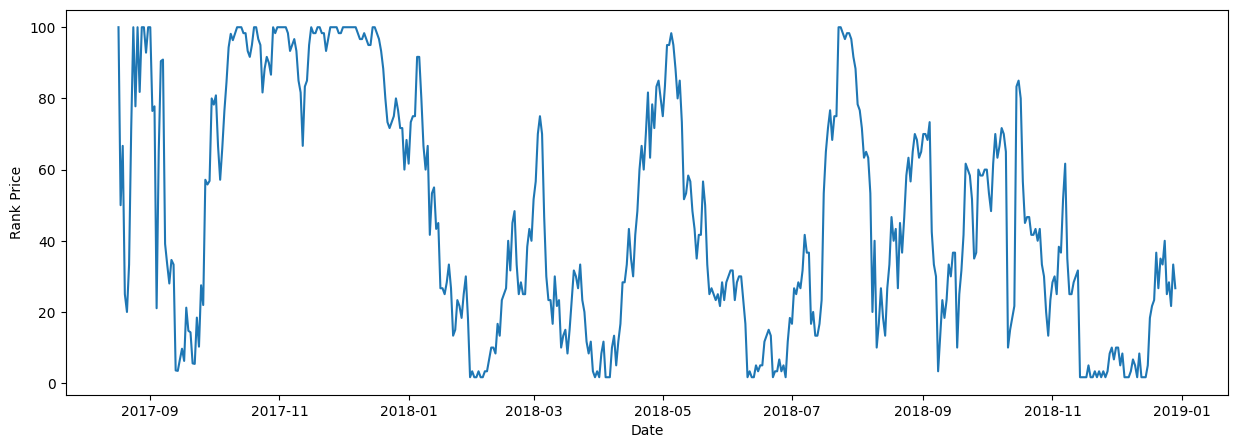

In [5]:
price = df['Close']
rank_p=st.pct_rank(price)
plt.figure(figsize=(15,5))
plt.plot(df['Date'],rank_p)
plt.ylabel('Rank Price')
plt.xlabel('Date')
rank_p

it refers to a process of ranking the prices of a particular security or asset over a specified time window or period. This process can be used in financial analysis to identify the relative performance of a security or asset compared to other securities or assets within a specified time frame.  
Here, I use 60 window which means each price is ranked with respect to its most recent 60 prices (oi certain price er ager 59 ta price shoho) and showing the percentail rank of that price among the 60 prices to show the short term price flactuations in the fig.

however, if it is applied on full data set of 10 coins, we will get like this:

e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)
e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)
e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)
e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return _pd.concat(dfs, 1, sort=True)
e:\OneDrive - BUET\Desktop\Portfolio MGT\quantstats\utils.py:68: FutureWarning: In a future vers

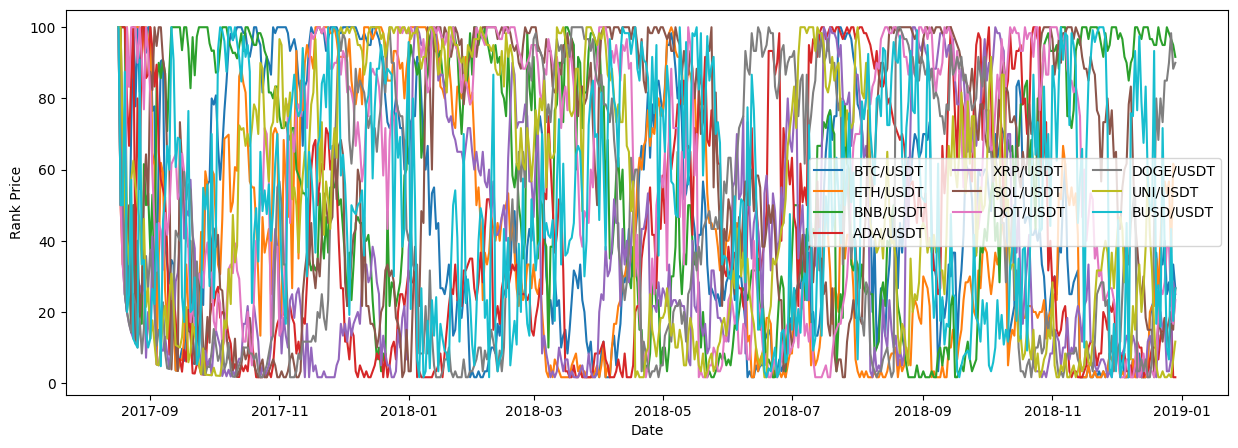

,BTC/USDT,ETH/USDT,BNB/USDT,ADA/USDT,XRP/USDT,SOL/USDT,DOT/USDT,DOGE/USDT,UNI/USDT,BUSD/USDT
Date,,,,,,,,,,
2017-08-17,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2017-08-18,50.000000,50.000000,100.000000,100.000000,100.000000,100.000000,50.000000,50.000000,100.000000,50.000000
2017-08-19,66.666667,33.333333,100.000000,100.000000,33.333333,66.666667,33.333333,66.666667,66.666667,50.000000
2017-08-20,25.000000,75.000000,100.000000,100.000000,25.000000,50.000000,25.000000,25.000000,50.000000,87.500000
2017-08-21,20.000000,100.000000,40.000000,80.000000,20.000000,20.000000,100.000000,20.000000,40.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...
2018-12-25,25.000000,53.333333,100.000000,15.000000,3.333333,15.000000,38.333333,85.000000,1.666667,10.000000
2018-12-26,28.333333,56.666667,98.333333,17.500000,3.333333,10.000000,38.333333,90.000000,2.500000,6.666667
2018-12-27,21.666667,36.666667,96.666667,20.000000,6.666667,16.666667,23.333333,98.333333,1.666667,43.333333


In [6]:
rank_p = price_df.apply(st.pct_rank, axis=0)
plt.figure(figsize=(15,5))
plt.plot(rank_p)
plt.ylabel('Rank Price')
plt.xlabel('Date')
plt.legend(iter(x), return_df.columns, ncol=3)
plt.show()
rank_p

### Total Compounded Return

In [7]:
cmp_ret = st.comp(return_df)
cmp_ret = cmp_ret.sort_values()
cmp_ret

ADA/USDT    -0.916815
XRP/USDT    -0.837281
ETH/USDT    -0.821720
DOGE/USDT   -0.529248
BTC/USDT    -0.522280
UNI/USDT    -0.369854
BUSD/USDT   -0.001068
DOT/USDT     1.013094
BNB/USDT     1.557711
SOL/USDT     7.696613
dtype: float64

A negative compounded return indicates a decrease in value over the specified period, while a positive compounded return indicates a increase in value over the period

### Rolling compounded returns

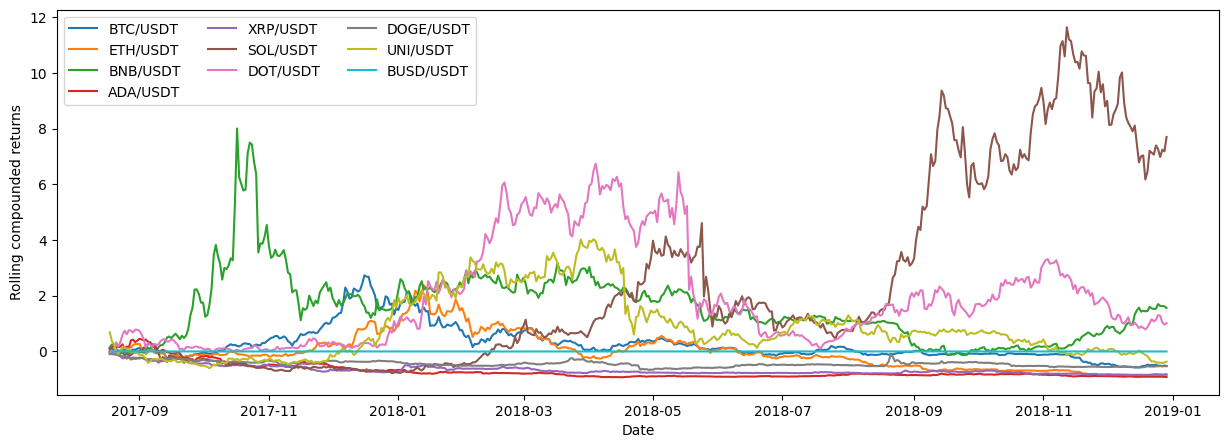

In [8]:
rol_com_ret=st.compsum(return_df)
plt.figure(figsize=(15,5))
plt.plot(rol_com_ret)
plt.ylabel('Rolling compounded returns')
plt.xlabel('Date')
plt.legend(iter(x), return_df.columns, ncol=3)
plt.show()


Rolling compounded return shows the flactuations of compuunded return over the periods. Here We can see SOL/USDT has heighest positive return and higher return flactuations, in contrast ADA/USDT has neg return but less flactuations again BNB gives moderate return but higher flactuations

### Expected Return

<AxesSubplot: >

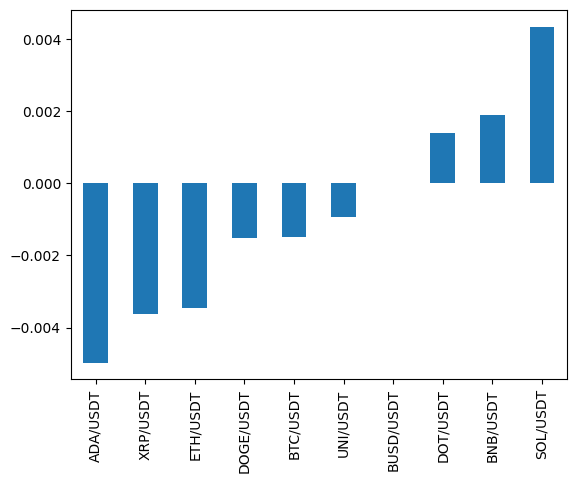

In [9]:
ER = st.expected_return(return_df)
ER=ER.sort_values()
ER.plot.bar()

it has determined with geometric holding period mathod. So, here negative values are implied negative yearly returns possibilities based on previous data

### Outliers

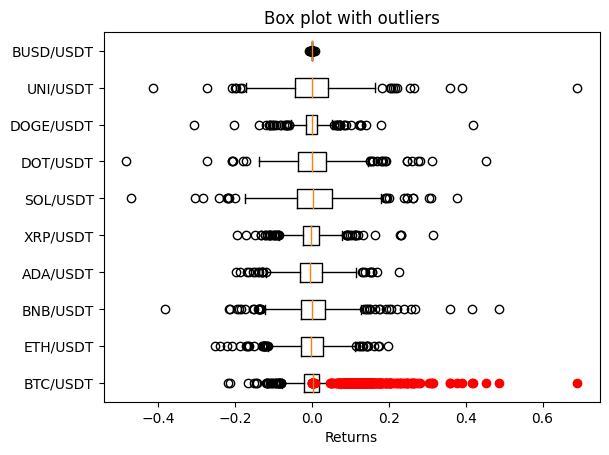

In [35]:
otL=st.outliers(return_df)
fig, ax = plt.subplots()
ax.boxplot(return_df, vert=False, showfliers=True)
ax.plot(otL, [1]*len(otL), 'ro')
ax.set_title('Box plot with outliers')
ax.set_xlabel('Returns')
ax.set_yticklabels(coin_list)
plt.show()